# Boston 房價預測

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 載入 Boston 房價資料集

In [2]:
with open('./data/housing.data', encoding='utf8') as f:
    data = f.readlines()
all_fields = []
for line in data:
    line2 = line[1:].replace('   ', ' ').replace('  ', ' ')
    fields = []
    for item in line2.split(' '):
        fields.append(float(item.strip()))
        if len(fields) == 14:
            all_fields.append(fields)
df = pd.DataFrame(all_fields)
df.columns = 'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV'.split(',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X, y = df.drop('MEDV', axis=1).values, df.MEDV.values

In [7]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 特徵縮放

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 建立模型

In [21]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=1, input_shape=[13])  
    ]
)

In [22]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam()) # 0.2

In [23]:
history = model.fit(X_train_std, y_train, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


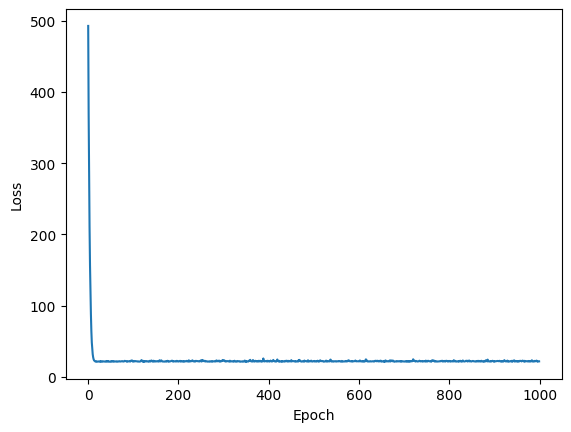

In [24]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

## 評分

In [25]:
y_pred = model.predict(X_test_std, verbose=False)
mean_squared_error(y_test, pred), r2_score(y_test, pred)
print(f'R2 = {r2_score(y_test, y_pred):.2f}') 
print(f'MSE = {mean_squared_error(y_test, y_pred)}') 

R2 = 0.71
MSE = 29.814393801630263


## 使用Scikit-learn迴歸

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print(f'R2 = {r2_score(y_test, y_pred):.2f}') 
print(f'MSE = {mean_squared_error(y_test, y_pred)}') 

R2 = 0.72
MSE = 29.098724687315837


## 結論：使用Scikit-learn迴歸準確率較高，請問Keras模型應如何調校?